In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv("../outputs/boston_clean.csv")

# X, y 분리
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)


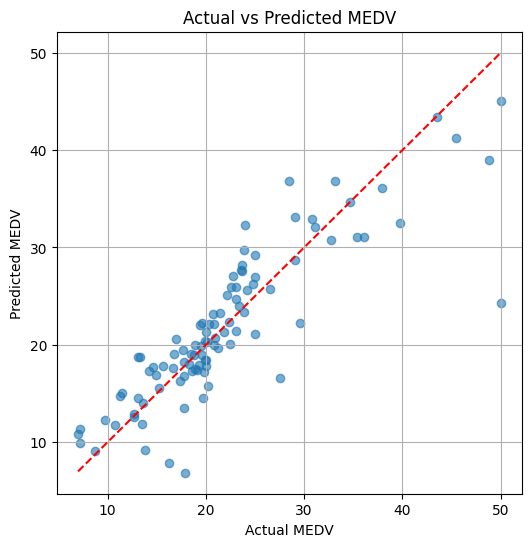

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV")
plt.grid(True)
plt.show()

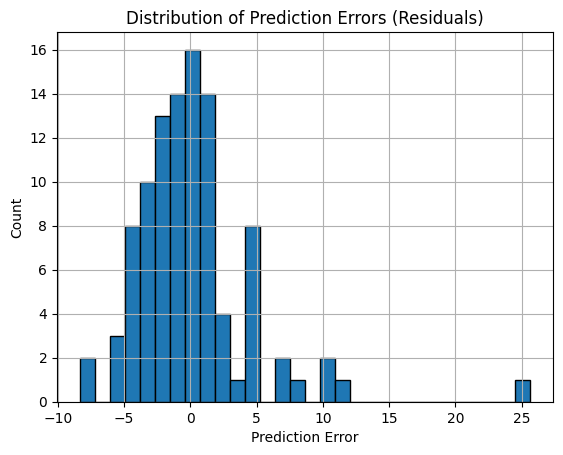

In [14]:
import numpy as np

residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.grid(True)
plt.show()


      Feature  Coefficient
14  LOG_LSTAT    -8.783211
12      LSTAT     3.521446
7         DIS    -2.486064
8         RAD     2.333274
0        CRIM    -2.031693
5          RM     1.714421
4         NOX    -1.703801
10    PTRATIO    -1.695237
9         TAX    -1.502184
11          B     0.889768
13   LOG_CRIM     0.753171
3        CHAS     0.573419
6         AGE     0.448767
1          ZN     0.365454
2       INDUS     0.117823


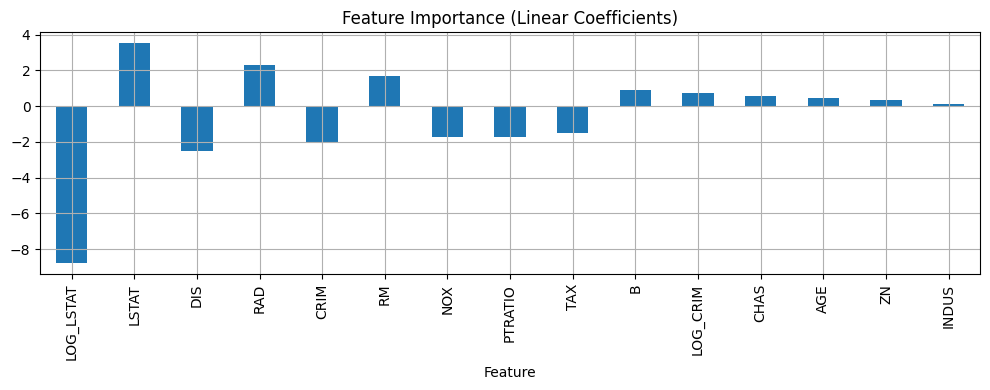

In [15]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df)

# 시각화도 추가 가능
coef_df.plot(kind="bar", x="Feature", y="Coefficient", legend=False, figsize=(10, 4), title="Feature Importance (Linear Coefficients)")
plt.tight_layout()
plt.grid(True)
plt.show()


In [16]:
import joblib

joblib.dump(model, "linear_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [17]:
import pandas as pd

results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
results.to_csv("predictions.csv", index=False)


In [18]:
import pickle

with open("linear_model.pkl", "wb") as f:
    pickle.dump(linear_model, f)
